In [9]:
import json

from matplotlib.pyplot import figure, imshow, show, subplot
import numpy as np
from PIL import Image
import torch
from torch.hub import load_state_dict_from_url
import torch.nn as nn
from torchvision import transforms


download_from = 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth'

apply_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)])

class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        feature = self.features(x)
        x = self.avgpool(feature)
        x = self.classifier(torch.flatten(x, 1))
        return x, feature

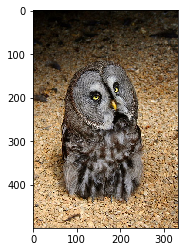

In [10]:
image_path = r'images/n01622779_1037.JPEG'
image = Image.open(image_path)


figure()
imshow(np.array(image))
show()

In [13]:
def get_vgg(path, download=False):
    model = VGG16()
    model = model.eval()

    if download:
        parameters = load_state_dict_from_url(download_from)
    else:
        parameters = torch.load('/home/')
        
    model.load_state_dict(parameters)
    return model


input_batch = torch.unsqueeze(apply_transform(image), 0)

vgg16 = get_vgg()
output, feature = vgg16(input_batch)
_, index = torch.max(output, 1)

print(f'Class index is {index}')

with open('imagenet_cls1000.json', 'r') as f:
    cls_labels = json.load(f)

print(f'Class name is {cls_labels[str(index[0].item())]}')

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /home/ckpt/vgg16-397923af.pth/vgg16_bn-6c64b313.pth


NotADirectoryError: [Errno 20] Not a directory: '/home/ckpt/vgg16-397923af.pth/tmp7mjmopt3'

In [ ]:
feature_map = feature.detach().numpy().squeeze()

figure()
imshow(np.mean(feature_map, 0))
show()